In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
multas_transito = pd.read_csv('Parking_Violations_Issued.csv', low_memory=False)

multas_transito.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1361929741,FCJ5493,NY,PAS,12/18/1970,20,SUBN,GMC,S,35030,...,BLACK,0.0,2013.0,-,0.0,NaN,NaN,NaN,NaN,NaN
1,1366962000,63540MC,NY,COM,02/02/1971,46,DELV,FRUEH,P,58830,...,BRN,0.0,2013.0,-,0.0,NaN,NaN,NaN,NaN,NaN
2,1342296187,GCY4187,NY,SRF,09/18/1971,21,VAN,FORD,S,11790,...,BLUE,0.0,2002.0,-,0.0,NaN,NaN,NaN,NaN,NaN
3,1342296199,95V6675,TX,PAS,09/18/1971,21,NaN,GMC,S,11790,...,SILVR,0.0,2008.0,-,0.0,NaN,NaN,NaN,NaN,NaN
4,1342296217,FYM5117,NY,SRF,09/18/1971,21,SUBN,NISSA,S,28190,...,WHITE,0.0,2012.0,-,0.0,NaN,NaN,NaN,NaN,NaN


Criando uma função para transformar em date os objetos(string) que estão na coluna Issue Date.

In [3]:
multas_transito['Issue Date'] = pd.to_datetime(multas_transito['Issue Date'])

Criando uma funcao para limitar o ano das datas e joga-las num novo dataframe para melhor analisa-las 

In [4]:
multas_transito= multas_transito[multas_transito['Issue Date'].dt.year <= 2024]

In [5]:
anos = np.array([date.year for date in multas_transito['Issue Date']])

Usando numpy para somar as ocorrencias de cada ano. Para isso usamos a funcao zip para fazer as combinacoes de pares e valores entre
anos sem repetir e a contagem de quantidade e dict para criar um novo dicionario

In [6]:
anos_sem_repetir, quantidade = np.unique(anos, return_counts=True)


violacoes_por_ano = dict(zip(anos_sem_repetir,quantidade))


Criando um dataFrame para alocar e exibir os resultados das multas por anos e mostrar em tela na ordem crescente dos últimos anos

In [7]:
violacoes_por_ano = pd.DataFrame({'Ano':anos_sem_repetir, 'Ocorrências': quantidade}).sort_values(by='Ocorrências', ascending=False)

violacoes_por_ano = violacoes_por_ano.head(40)

print(violacoes_por_ano)

     Ano  Ocorrências
28  2014      4716511
27  2013      4379107
29  2015         1522
26  2012          618
33  2019          329
14  2000          319
31  2017          309
30  2016          296
25  2011          251
32  2018          181
24  2010          129
15  2001           91
18  2004           77
17  2003           39
37  2023           31
35  2021           26
38  2024           23
34  2020           18
21  2007           13
20  2006           11
2   1973           10
23  2009            9
19  2005            9
22  2008            8
16  2002            7
1   1971            6
7   1981            4
10  1987            3
4   1976            2
9   1984            2
6   1979            2
11  1990            2
5   1977            1
0   1970            1
3   1974            1
12  1991            1
8   1983            1
13  1996            1
36  2022            1


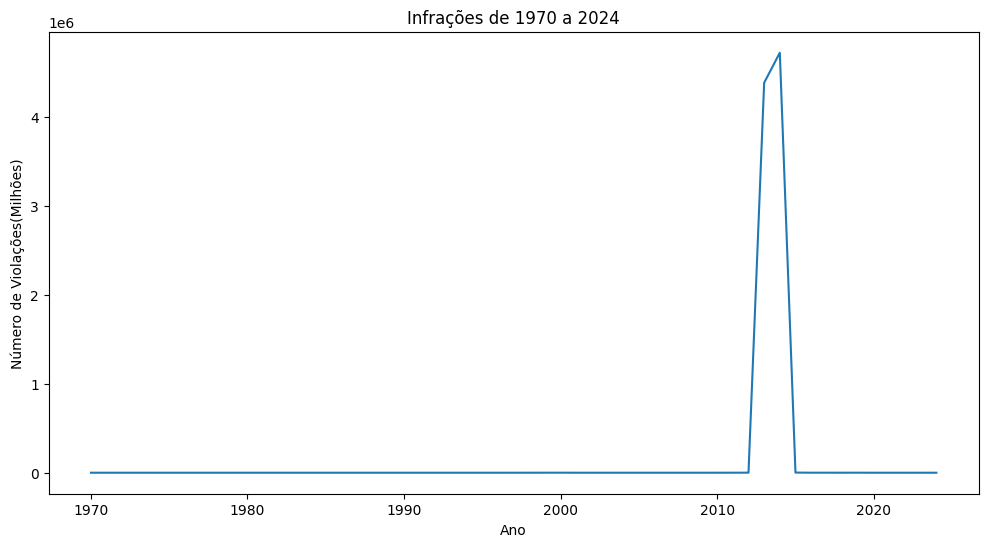

In [8]:
plt.figure(figsize=(12,6))

sns.lineplot(x='Ano', y='Ocorrências', data=violacoes_por_ano, markers='u')


plt.title('Infrações de 1970 a 2024')
plt.xlabel('Ano')
plt.ylabel('Número de Violações(Milhões)')

plt.show()


Criando um array com as ocorrencias de placas registradas por estado

In [9]:
estados_mais_multas = np.array(multas_transito['Registration State'])

In [10]:
multas_por_estado, contador_multas = np.unique(estados_mais_multas, return_counts=True)

quantidade_multas_estado = dict(zip(multas_por_estado, contador_multas))
quantidade_multas_estado

{'99': np.int64(38070),
 'AB': np.int64(243),
 'AK': np.int64(961),
 'AL': np.int64(5827),
 'AR': np.int64(2716),
 'AZ': np.int64(24242),
 'BC': np.int64(329),
 'CA': np.int64(20099),
 'CO': np.int64(3663),
 'CT': np.int64(136966),
 'DC': np.int64(3728),
 'DE': np.int64(14643),
 'DP': np.int64(5264),
 'FL': np.int64(111882),
 'FO': np.int64(9),
 'GA': np.int64(30837),
 'GV': np.int64(1317),
 'HI': np.int64(395),
 'IA': np.int64(7166),
 'ID': np.int64(5863),
 'IL': np.int64(31762),
 'IN': np.int64(49124),
 'KS': np.int64(1226),
 'KY': np.int64(3222),
 'LA': np.int64(2500),
 'MA': np.int64(78647),
 'MB': np.int64(22),
 'MD': np.int64(50406),
 'ME': np.int64(19458),
 'MI': np.int64(16365),
 'MN': np.int64(12900),
 'MO': np.int64(2875),
 'MS': np.int64(3428),
 'MT': np.int64(622),
 'MX': np.int64(108),
 'NB': np.int64(151),
 'NC': np.int64(47115),
 'ND': np.int64(431),
 'NE': np.int64(1626),
 'NF': np.int64(1),
 'NH': np.int64(9929),
 'NJ': np.int64(878659),
 'NM': np.int64(2936),
 'NS': n

In [11]:
maiores_estados = (pd.DataFrame({'Estado':multas_por_estado,'Multas':contador_multas})
                            .sort_values(by='Multas', ascending=False))

maiores_estados = maiores_estados.head(5)

maiores_estados


,Estado,Multas
46,NY,7029580
41,NJ,878659
51,PA,225750
9,CT,136966
13,FL,111882


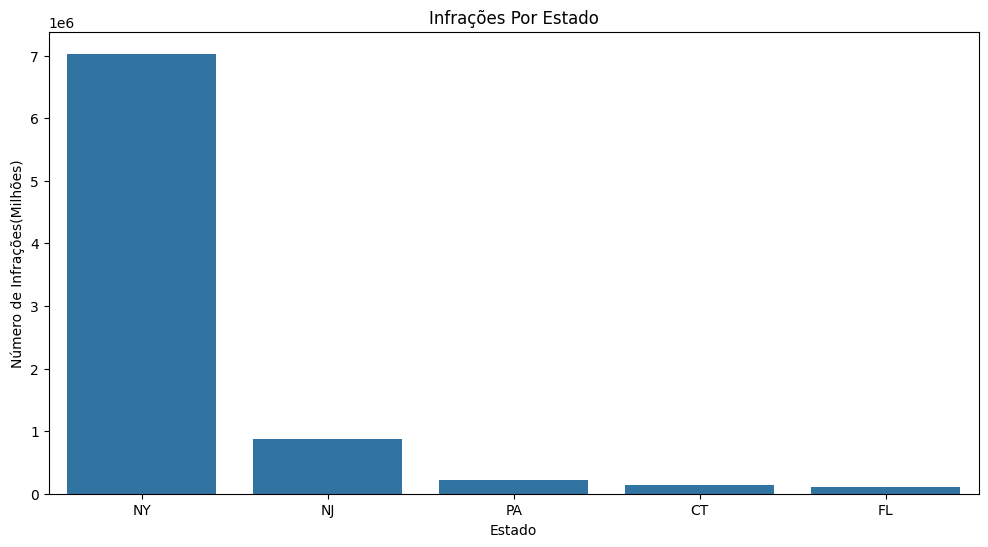

In [12]:
plt.figure(figsize=(12,6))

sns.barplot(x='Estado', y='Multas', data=maiores_estados)


plt.title('Infrações Por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Infrações(Milhões)')

plt.show()



Distribuição por tipo de veículo:

Explore quais tipos de veículos (sedan, caminhão, SUV, etc.) estão mais frequentemente envolvidos em infrações de estacionamento. Calcule a proporção de cada tipo em relação ao total de violações.

In [13]:
multas_tipos_veiculo = multas_transito['Vehicle Body Type'].dropna()

multas_tipos_veiculo = np.array(multas_tipos_veiculo)


In [14]:

filtrando_tipos_veiculo = np.array([x for x in multas_tipos_veiculo if isinstance(x,str)])

multas_tipos_veiculo = filtrando_tipos_veiculo

print(multas_tipos_veiculo)

['SUBN' 'DELV' 'VAN' ... 'VAN' 'VAN' 'SDN']


In [15]:
multas_tipos_veiculo, contador_multas_veiculo = np.unique(multas_tipos_veiculo, return_counts=True)

quantidade_multas_tipo_veiculo = dict(zip(multas_tipos_veiculo, contador_multas_veiculo))

quantidade_multas_tipo_veiculo


{np.str_('-'): np.int64(1),
 np.str_('00'): np.int64(13),
 np.str_('10'): np.int64(2),
 np.str_('12PU'): np.int64(25),
 np.str_('12VN'): np.int64(8),
 np.str_('1JV'): np.int64(1),
 np.str_('1TPU'): np.int64(1),
 np.str_('2 D'): np.int64(2),
 np.str_('2 DO'): np.int64(7),
 np.str_('2 DR'): np.int64(1889),
 np.str_('20'): np.int64(1),
 np.str_('200'): np.int64(6),
 np.str_('230'): np.int64(1),
 np.str_('250'): np.int64(4),
 np.str_('2C'): np.int64(37),
 np.str_('2CV'): np.int64(4),
 np.str_('2D'): np.int64(573),
 np.str_('2D C'): np.int64(1),
 np.str_('2D H'): np.int64(8),
 np.str_('2D S'): np.int64(112),
 np.str_('2DCV'): np.int64(2),
 np.str_('2DHA'): np.int64(4),
 np.str_('2DHB'): np.int64(2),
 np.str_('2DHT'): np.int64(52),
 np.str_('2DOO'): np.int64(1),
 np.str_('2DR'): np.int64(2),
 np.str_('2DSD'): np.int64(255204),
 np.str_('2DSE'): np.int64(7),
 np.str_('2F'): np.int64(3),
 np.str_('2H'): np.int64(97),
 np.str_('2HB'): np.int64(3),
 np.str_('2HT'): np.int64(2),
 np.str_('2HXS'):

In [16]:
mais_infratores = (pd.DataFrame({'Tipos de Veículos':multas_tipos_veiculo,'Multas':contador_multas_veiculo})
                            .sort_values(by='Multas', ascending=False))

mais_infratores.head(5)

,Tipos de Veículos,Multas
1627,SUBN,2797605
67,4DSD,2513584
1981,VAN,1384351
437,DELV,730503
1492,SDN,441695


In [17]:
cinco_infratores = mais_infratores.head(5)
cinco_infratores

,Tipos de Veículos,Multas
1627,SUBN,2797605
67,4DSD,2513584
1981,VAN,1384351
437,DELV,730503
1492,SDN,441695


In [18]:
total_multas = multas_transito.shape
total_multas = 9099972
total_multas


9099972

In [ ]:
cinco_infratores['Proporcao'] = round(cinco_infratores['Multas']/total_multas*100,2)

In [20]:
cinco_infratores

,Tipos de Veículos,Multas,Proporcao
1627,SUBN,2797605,30.74
67,4DSD,2513584,27.62
1981,VAN,1384351,15.21
437,DELV,730503,8.03
1492,SDN,441695,4.85


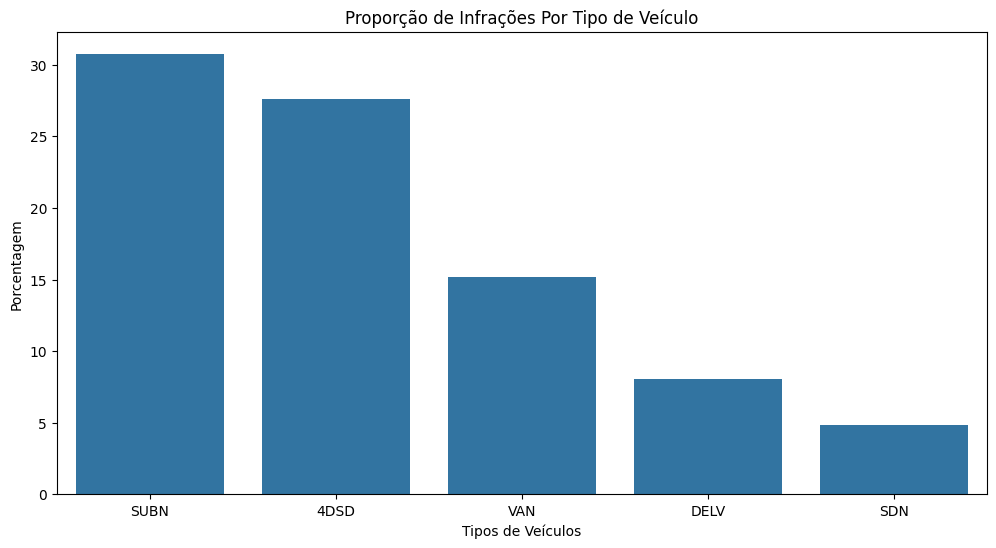

In [21]:
plt.figure(figsize=(12,6))

sns.barplot(x='Tipos de Veículos', y='Proporcao', data=cinco_infratores)


plt.title('Proporção de Infrações Por Tipo de Veículo')
plt.xlabel('Tipos de Veículos')
plt.ylabel('Porcentagem')

plt.show()

Identificação do código de violação mais frequente:

Avalie quais são os códigos de violação mais recorrentes. Isso ajudará a entender quais regras de estacionamento são mais frequentemente desrespeitadas.


In [22]:
multas_mais_comuns = multas_transito['Violation Code']
tipos_multas_mais_comuns = np.array(multas_mais_comuns)
tipos_multas_mais_comuns

array([20, 46, 21, ..., 14, 55, 21], shape=(9099972,))

In [23]:
tipos_multas_mais_comuns, contador_multa = np.unique(multas_mais_comuns, return_counts=True)

quantidade_tipos_multas_mais_comuns = dict(zip(tipos_multas_mais_comuns, contador_multa))

quantidade_tipos_multas_mais_comuns

{np.int64(0): np.int64(21),
 np.int64(1): np.int64(18),
 np.int64(2): np.int64(14),
 np.int64(3): np.int64(15),
 np.int64(4): np.int64(748),
 np.int64(5): np.int64(131519),
 np.int64(6): np.int64(314),
 np.int64(7): np.int64(433213),
 np.int64(8): np.int64(2800),
 np.int64(9): np.int64(9121),
 np.int64(10): np.int64(28384),
 np.int64(11): np.int64(4068),
 np.int64(12): np.int64(73),
 np.int64(13): np.int64(30720),
 np.int64(14): np.int64(851666),
 np.int64(15): np.int64(91),
 np.int64(16): np.int64(219168),
 np.int64(17): np.int64(99023),
 np.int64(18): np.int64(19909),
 np.int64(19): np.int64(287461),
 np.int64(20): np.int64(545151),
 np.int64(21): np.int64(1239558),
 np.int64(22): np.int64(46),
 np.int64(23): np.int64(2757),
 np.int64(24): np.int64(23811),
 np.int64(25): np.int64(299),
 np.int64(26): np.int64(191),
 np.int64(27): np.int64(11559),
 np.int64(28): np.int64(22),
 np.int64(29): np.int64(45),
 np.int64(30): np.int64(29),
 np.int64(31): np.int64(173028),
 np.int64(32): np.i

In [24]:
mais_comuns = (pd.DataFrame({'Código de Multas': tipos_multas_mais_comuns, 'Quantidade':contador_multa})
                      .sort_values(by='Quantidade', ascending=False))

dez_mais_comuns = mais_comuns.head(10)

dez_mais_comuns

,Código de Multas,Quantidade
38,38,1243477
21,21,1239558
14,14,851666
37,37,738575
20,20,545151
71,71,519148
46,46,462273
40,40,455455
7,7,433213
19,19,287461


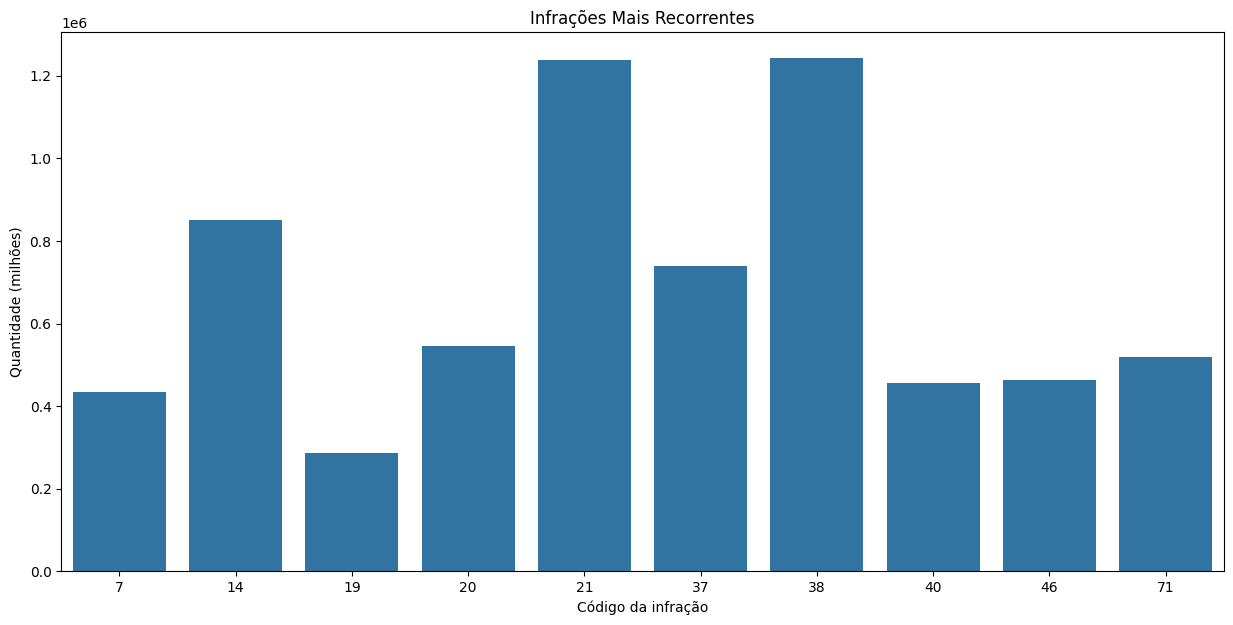

In [25]:
plt.figure(figsize=(15,7))

sns.barplot(x='Código de Multas', y='Quantidade', data=dez_mais_comuns)


plt.title('Infrações Mais Recorrentes')
plt.xlabel('Código da infração')
plt.ylabel('Quantidade (milhões)')

plt.show()

Examine a distribuição das infrações ao longo do dia. Identifique se há mais violações durante a manhã, tarde ou noite, e determine os horários de pico.

In [26]:
hora_multa = multas_transito['Violation Time']
comparar_manha = 'A'

horarios_manha = hora_multa[hora_multa.str[-1]==comparar_manha].dropna()




In [27]:
horarios_manha = horarios_manha.str[:-1]
horarios_manha

0          0358
1          1116
2          0939
3          0945
4          0950
           ... 
9099967    1114
9099968    1140
9099969    0617
9099971    1000
9099972    0845
Name: Violation Time, Length: 4438560, dtype: object

In [28]:
horarios_manha_filrado = horarios_manha[horarios_manha.str.match(r'^\d{4}')]

horarios_manha_filrado

0          0358
1          1116
2          0939
3          0945
4          0950
           ... 
9099967    1114
9099968    1140
9099969    0617
9099971    1000
9099972    0845
Name: Violation Time, Length: 4438531, dtype: object

In [29]:
def converter_para_hora(horarios_manha_filrado):
    return datetime.strptime(horarios_manha_filrado, "%H%M").time()

horarios_manha_convertidos = horarios_manha_filrado.apply(converter_para_hora)

horarios_manha_convertidos

0          03:58:00
1          11:16:00
2          09:39:00
3          09:45:00
4          09:50:00
             ...   
9099967    11:14:00
9099968    11:40:00
9099969    06:17:00
9099971    10:00:00
9099972    08:45:00
Name: Violation Time, Length: 4438531, dtype: object

In [30]:
comparar_tarde = 'P'

horarios_tarde = hora_multa[hora_multa.str[-1]==comparar_tarde].dropna()

horarios_tarde = horarios_tarde.str[:-1]




In [31]:
horarios_filtrado = horarios_tarde[horarios_tarde.str.match(r'^\d{4}$')]

horarios_filtrado = horarios_filtrado[horarios_filtrado<='1200']

horarios_tarde_filtrado = horarios_filtrado[horarios_filtrado<='0600']

horarios_filtrado


5          0914
6          0115
7          0555
14         0138
20         0635
           ... 
9099962    1145
9099963    1051
9099965    0700
9099966    0107
9099970    0137
Name: Violation Time, Length: 3956242, dtype: object

In [32]:
def converter_hora(horarios_tarde_filtrado):
    return datetime.strptime(horarios_tarde_filtrado, "%H%M").time()

horarios_tarde_convertidos = horarios_tarde_filtrado.apply(converter_hora)

horarios_tarde_convertidos


6          01:15:00
7          05:55:00
14         01:38:00
23         05:49:00
35         02:23:00
             ...   
9099949    01:15:00
9099952    05:02:00
9099961    02:15:00
9099966    01:07:00
9099970    01:37:00
Name: Violation Time, Length: 3171363, dtype: object

In [33]:
horarios_noite_filtrado = horarios_filtrado[horarios_filtrado>='0601']

horarios_noite_filtrado

5          0914
20         0635
28         0705
29         0835
32         1035
           ... 
9099956    0708
9099958    1119
9099962    1145
9099963    1051
9099965    0700
Name: Violation Time, Length: 784879, dtype: object

In [34]:
def converter_hora(horarios_noite_filtrado):
    return datetime.strptime(horarios_noite_filtrado, "%H%M").time()

horarios_noite_convertido = horarios_noite_filtrado.apply(converter_hora)

horarios_noite_convertido

5          09:14:00
20         06:35:00
28         07:05:00
29         08:35:00
32         10:35:00
             ...   
9099956    07:08:00
9099958    11:19:00
9099962    11:45:00
9099963    10:51:00
9099965    07:00:00
Name: Violation Time, Length: 784879, dtype: object

In [35]:
multas_manha = np.array(horarios_manha_convertidos)

multas_manha, contador_manha = np.unique(multas_manha, return_counts=True)

quantidade_multas_manha = dict(zip(multas_manha, contador_manha))

quantidade_multas_manha

{datetime.time(0, 0): np.int64(1497),
 datetime.time(0, 1): np.int64(474),
 datetime.time(0, 2): np.int64(395),
 datetime.time(0, 3): np.int64(407),
 datetime.time(0, 4): np.int64(366),
 datetime.time(0, 5): np.int64(470),
 datetime.time(0, 6): np.int64(1044),
 datetime.time(0, 7): np.int64(1202),
 datetime.time(0, 8): np.int64(1142),
 datetime.time(0, 9): np.int64(1129),
 datetime.time(0, 10): np.int64(1322),
 datetime.time(0, 11): np.int64(1183),
 datetime.time(0, 12): np.int64(1189),
 datetime.time(0, 13): np.int64(1098),
 datetime.time(0, 14): np.int64(1081),
 datetime.time(0, 15): np.int64(1152),
 datetime.time(0, 16): np.int64(1052),
 datetime.time(0, 17): np.int64(1072),
 datetime.time(0, 18): np.int64(1009),
 datetime.time(0, 19): np.int64(976),
 datetime.time(0, 20): np.int64(1113),
 datetime.time(0, 21): np.int64(972),
 datetime.time(0, 22): np.int64(955),
 datetime.time(0, 23): np.int64(977),
 datetime.time(0, 24): np.int64(902),
 datetime.time(0, 25): np.int64(1053),
 datet

In [36]:
horas_mais_comuns = (pd.DataFrame({'Horario': multas_manha, 'Quantidade':contador_manha})
                      .sort_values(by='Quantidade', ascending=False))

mais_comuns_manha = horas_mais_comuns.head(15)

mais_comuns_manha

,Horario,Quantidade
516,08:36:00,27494
696,11:36:00,23682
486,08:06:00,23229
576,09:36:00,22779
700,11:40:00,22323
546,09:06:00,22290
520,08:40:00,22215
580,09:40:00,21359
518,08:38:00,20529
517,08:37:00,20365


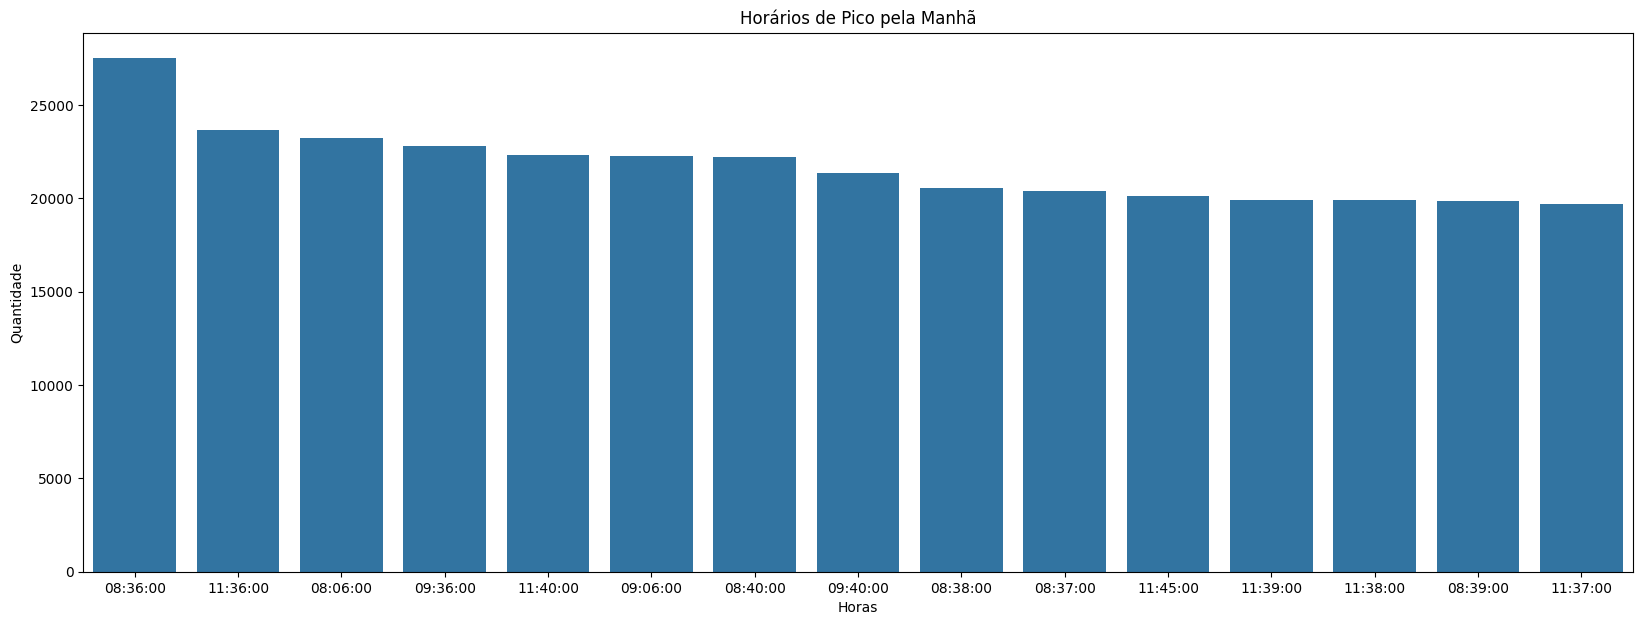

In [37]:
plt.figure(figsize=(20,7))

sns.barplot(x='Horario', y='Quantidade', data=mais_comuns_manha)


plt.title('Horários de Pico pela Manhã')
plt.xlabel('Horas')
plt.ylabel('Quantidade')

plt.show()

In [38]:
multas_tarde = np.array(horarios_tarde_convertidos)

multas_tarde, contador_tarde = np.unique(multas_tarde, return_counts=True)

quantidade_multas_tarde = dict(zip(multas_tarde, contador_tarde))

quantidade_multas_tarde

{datetime.time(0, 0): np.int64(464),
 datetime.time(0, 1): np.int64(4),
 datetime.time(0, 2): np.int64(3),
 datetime.time(0, 3): np.int64(4),
 datetime.time(0, 4): np.int64(1),
 datetime.time(0, 5): np.int64(3),
 datetime.time(0, 6): np.int64(2),
 datetime.time(0, 7): np.int64(5),
 datetime.time(0, 8): np.int64(4),
 datetime.time(0, 9): np.int64(1),
 datetime.time(0, 10): np.int64(10),
 datetime.time(0, 11): np.int64(1),
 datetime.time(0, 12): np.int64(5),
 datetime.time(0, 14): np.int64(1),
 datetime.time(0, 15): np.int64(6),
 datetime.time(0, 16): np.int64(3),
 datetime.time(0, 17): np.int64(1),
 datetime.time(0, 18): np.int64(1),
 datetime.time(0, 20): np.int64(5),
 datetime.time(0, 21): np.int64(1),
 datetime.time(0, 22): np.int64(1),
 datetime.time(0, 23): np.int64(4),
 datetime.time(0, 24): np.int64(2),
 datetime.time(0, 25): np.int64(6),
 datetime.time(0, 26): np.int64(1),
 datetime.time(0, 27): np.int64(2),
 datetime.time(0, 28): np.int64(2),
 datetime.time(0, 30): np.int64(9),

In [39]:
horas_mais_comuns = (pd.DataFrame({'Horario': multas_tarde, 'Quantidade':contador_tarde})
                      .sort_values(by='Quantidade', ascending=False))

mais_comuns_tarde= horas_mais_comuns.head(15)

mais_comuns_tarde

,Horario,Quantidade
85,01:30:00,15993
90,01:35:00,15954
75,01:20:00,15866
95,01:40:00,15656
70,01:15:00,15612
65,01:10:00,15416
80,01:25:00,15366
100,01:45:00,15147
115,02:00:00,15080
105,01:50:00,15049


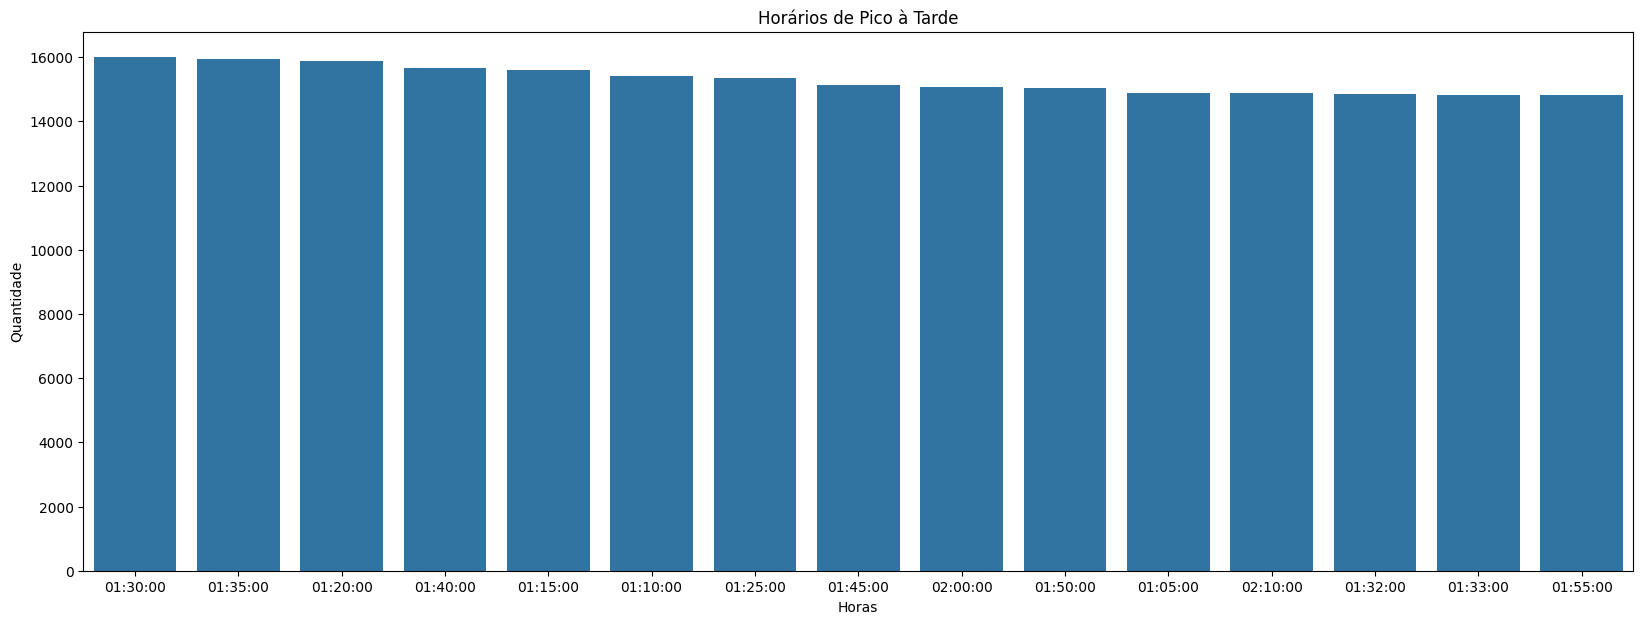

In [40]:
plt.figure(figsize=(20,7))

sns.barplot(x='Horario', y='Quantidade', data=mais_comuns_tarde)


plt.title('Horários de Pico à Tarde')
plt.xlabel('Horas')
plt.ylabel('Quantidade')

plt.show()

In [41]:
multas_noite = np.array(horarios_noite_convertido)

multas_noite, contador_noite = np.unique(multas_noite, return_counts=True)

quantidade_multas_noite = dict(zip(multas_noite, contador_noite))

quantidade_multas_noite

{datetime.time(6, 1): np.int64(5622),
 datetime.time(6, 2): np.int64(5765),
 datetime.time(6, 3): np.int64(5503),
 datetime.time(6, 4): np.int64(5626),
 datetime.time(6, 5): np.int64(6461),
 datetime.time(6, 6): np.int64(5720),
 datetime.time(6, 7): np.int64(5888),
 datetime.time(6, 8): np.int64(5875),
 datetime.time(6, 9): np.int64(5683),
 datetime.time(6, 10): np.int64(6718),
 datetime.time(6, 11): np.int64(5519),
 datetime.time(6, 12): np.int64(5678),
 datetime.time(6, 13): np.int64(5469),
 datetime.time(6, 14): np.int64(5275),
 datetime.time(6, 15): np.int64(6504),
 datetime.time(6, 16): np.int64(5165),
 datetime.time(6, 17): np.int64(5200),
 datetime.time(6, 18): np.int64(5256),
 datetime.time(6, 19): np.int64(4985),
 datetime.time(6, 20): np.int64(6201),
 datetime.time(6, 21): np.int64(4862),
 datetime.time(6, 22): np.int64(4868),
 datetime.time(6, 23): np.int64(4863),
 datetime.time(6, 24): np.int64(4632),
 datetime.time(6, 25): np.int64(5414),
 datetime.time(6, 26): np.int64(44

In [42]:
horas_mais_comuns = (pd.DataFrame({'Horario': multas_noite, 'Quantidade':contador_noite})
                      .sort_values(by='Quantidade', ascending=False))

mais_comuns_noite= horas_mais_comuns.head(15)

mais_comuns_noite

,Horario,Quantidade
359,12:00:00,15168
9,06:10:00,6718
14,06:15:00,6504
4,06:05:00,6461
19,06:20:00,6201
6,06:07:00,5888
7,06:08:00,5875
1,06:02:00,5765
29,06:30:00,5765
5,06:06:00,5720


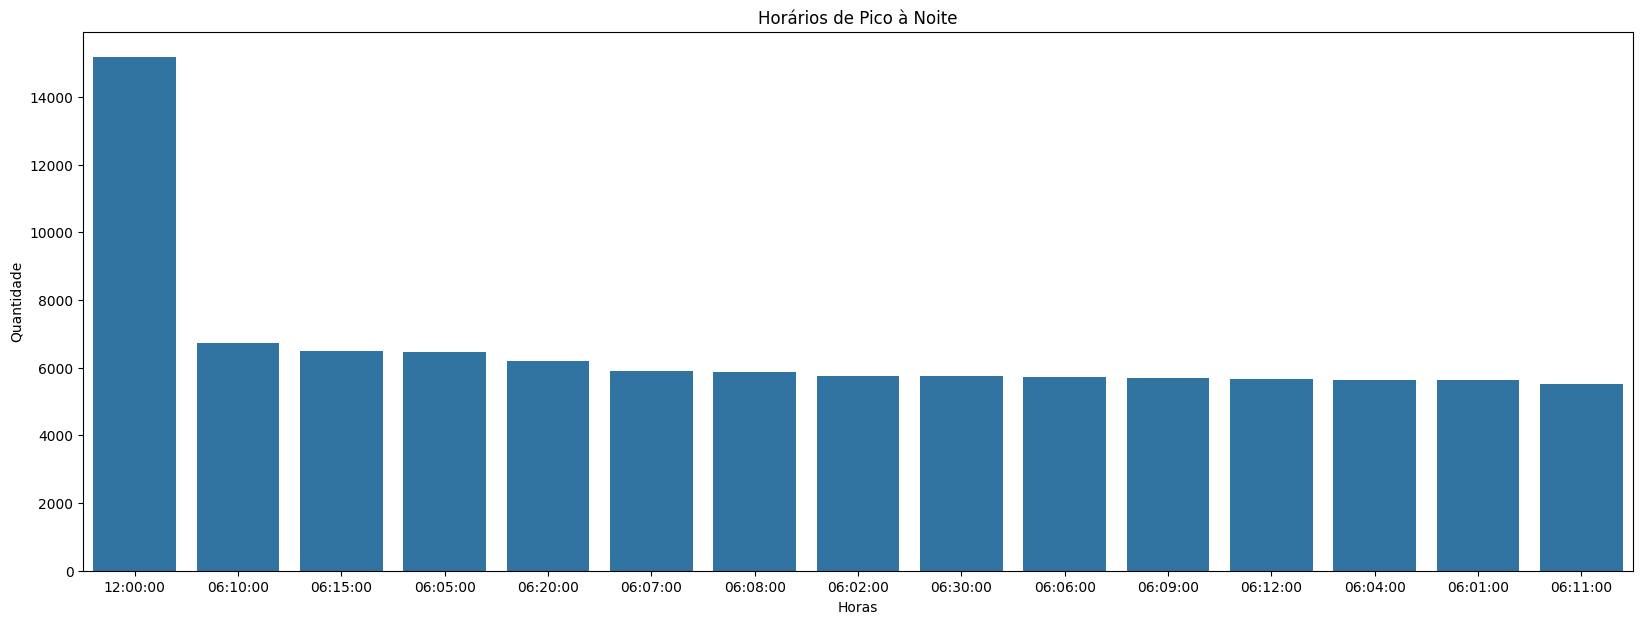

In [43]:
plt.figure(figsize=(20,7))

sns.barplot(x='Horario', y='Quantidade', data=mais_comuns_noite)


plt.title('Horários de Pico à Noite')
plt.xlabel('Horas')
plt.ylabel('Quantidade')

plt.show()

In [44]:

dados = {
    "Periodo": ["Manhã", "Tarde", "Noite"],
    "Quantidade": [15993, 3605, 27494]
}
df_periodo = pd.DataFrame(dados)

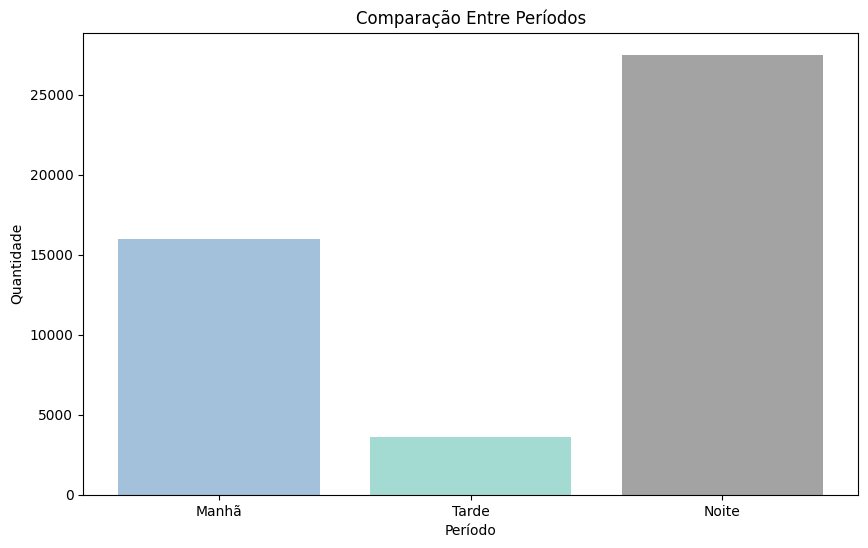

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(df_periodo["Periodo"], df_periodo["Quantidade"], color=['#A3C1DA', '#A3DAD2', '#A3A3A3'])


plt.title("Comparação Entre Períodos")
plt.xlabel("Período")
plt.ylabel("Quantidade")

plt.show()